## Black and White

In [ ]:
from convolve_images_11 import *

ModuleNotFoundError: No module named 'convolve_images_11'

In [ ]:
import numpy as np
import cv2
from scipy.signal import convolve2d
import os

os.makedirs('images_conv', exist_ok=True)
IMAGES_PATH = 'images_conv/'

def load_image(image_path, grayscale=True):
    if grayscale:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if image is None:
        print({image_path})
        return None
    return image

In [ ]:
input_image = load_image('almaty.jpg')


KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_almaty.jpg', image_sharpen)

True

In [ ]:
image_sharpen

array([[   0, -195, -195, ..., -185, -184,    0],
       [-195,  585,  390, ...,  371,  550, -184],
       [-195,  390,  195, ...,  185,  371, -185],
       ...,
       [ -88,  175,   82, ...,  102,  198,  -99],
       [ -75,  214,  129, ...,  192,  293,  -98],
       [   0,  -75,  -73, ...,  -98,  -98,    0]])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def save_and_show(input_image):
    if input_image is None:
        print("Ошибка")
    else:
        KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        image_sharpen = convolve2d(input_image, KERNEL)
        image_sharpen = np.clip(image_sharpen, 0, 255).astype(np.uint8)

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(image_sharpen, cmap='gray')
        axes[1].set_title('Sharpened Image')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()


        cv2.imwrite('images_conv/sharpened_almaty.jpg', image_sharpen)


In [ ]:
def save_and_show(input_image):
    if input_image is None:
        print("Ошибка")

        cv2.imwrite('images_conv/sharpened_almaty.jpg', image_sharpen)


In [ ]:
def save_and_show(input_image, custom_kernel=None):
    if input_image is None:
        print("Ошибка ")
        return

    if custom_kernel is None:
        KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    else:
        KERNEL = custom_kernel

    image_sharpen = convolve2d(input_image, KERNEL, mode='same', boundary='symm')
    image_sharpen = np.clip(image_sharpen, 0, 255).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(input_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(image_sharpen, cmap='gray')
    axes[1].set_title('Sharpened Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Сохранение
    cv2.imwrite('images_conv/sharpened_almaty.jpg', image_sharpen)


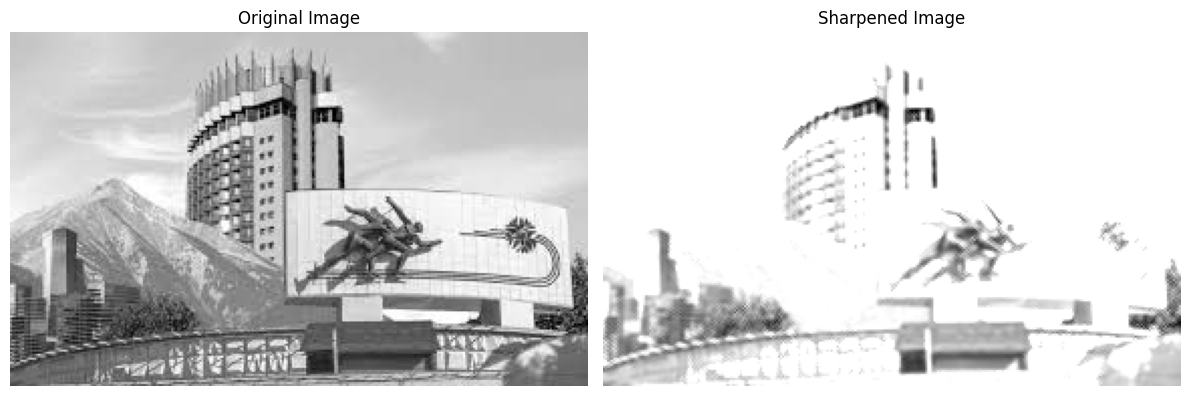

In [ ]:
reduce_contrast = np.array([[0, 0.5, 0],
                           [0.5, 0, 0.5],
                           [0, 0.5, 0]])
save_and_show(input_image, custom_kernel=reduce_contrast)

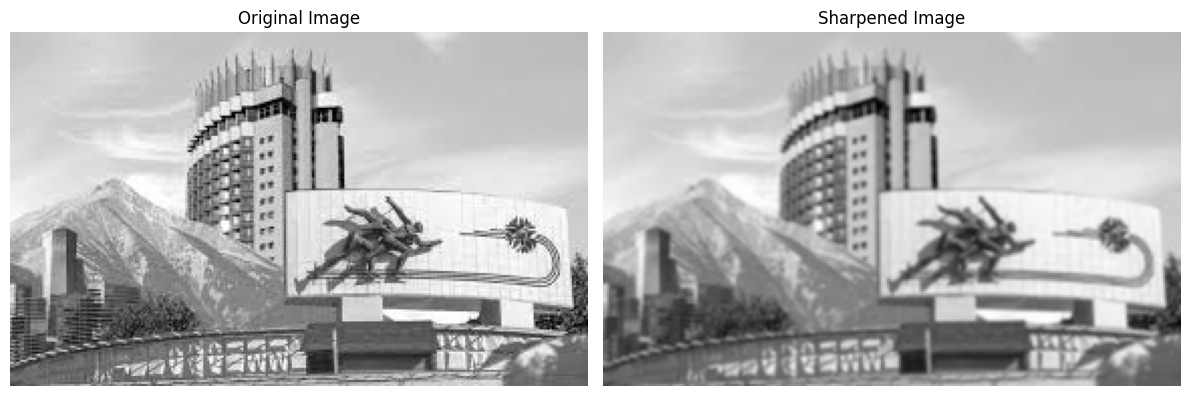

In [ ]:
gaussian_kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]) / 16
save_and_show(input_image, custom_kernel=gaussian_kernel)

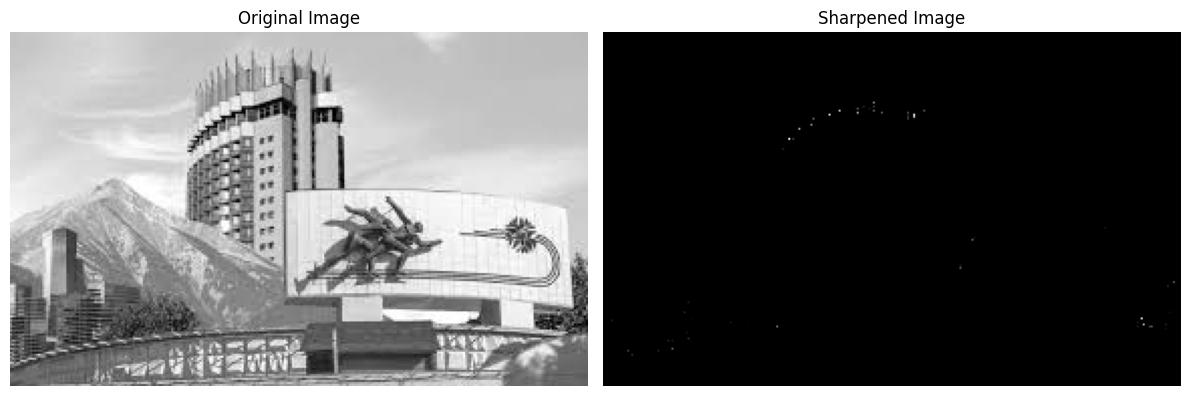

In [ ]:
save_and_show(input_image, custom_kernel=np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]))

In [ ]:

input_image = load_image('almaty.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_almaty.jpg', image_sharpen)


True

In [127]:
import cv2

class BlacknWhite(object):
    """BlacknWhite Filter
        A class that applies BlacknWhite filter to an image.
        The class uses downsampling, bilateral filter and upsampling to create
        a BlacknWhite filter.
    """
    def __init__(self):
        pass
    def resize(self,image, window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb,500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        return img_gray
    def start(self, img_path, image, new_image):
        tmp_canvas =BlacknWhite() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(f"{new_image}", res)
        # cv2.imshow(f"{image}", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as {new_image}")
        return 0

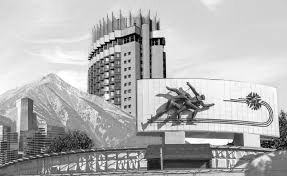

In [ ]:
from google.colab.patches import cv2_imshow

img_rgb = cv2.imread('almaty.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)

In [ ]:
filter_img = BlacknWhite()

In [ ]:
import os
img_path = os.getcwd()

In [ ]:
filter_img.start(img_path = img_path, image = 'almaty.jpg' , new_image = 'almaty_bw.jpg')

0

In [ ]:
img_rgb[0][0].shape

(3,)

In [ ]:
img_rgb = cv2.imread('almaty.jpg')
#img_rgb[0].shape
#img_rgb = img_rgb.resize(img_rgb,500)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

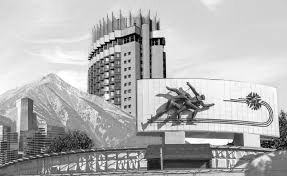

In [ ]:
cv2_imshow(img_gray)

## SHARPENING

In [ ]:
import cv2
import numpy as np

class sharpening:
    """sharpening filter ---
        This class will apply sharpening filter to an image
        by applying a defined kernel values to the image.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def sharp(self,image):
        # Create sharpening kernel
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        #kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        kernel = np.array([[-2, 0, -1], [-1, 1, 1], [0, 1, 2]])

        # applying the sharpening kernel to the input image & displaying it.
        sharpened = cv2.filter2D(image, -1, kernel)
        # Noise reduction
        sharpened = cv2.bilateralFilter(sharpened, 9, 75, 75)
        return sharpened

    def start(self, img_path, new_image):
        # Create an image object
        image = cv2.imread(img_path)
        image = self.resize(image, 500)
        tmp_canvas = sharpening()
        res = tmp_canvas.sharp(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow('original',image)
        # cv2.imshow('sharp',res)

        # print(f'Image saved as {new_image}')
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

In [ ]:
filter_sharp = sharpening()

In [ ]:
filter_sharp.start(img_path = 'almaty.jpg', new_image = 'almaty_sharp.jpg')

## CARTOONIZER

In [134]:

class Cartoonizer(object):
    """Cartoonizer effect
        A class that applies a cartoon effect to an image.
        The class uses a bilateral filter and adaptive thresholding to create
        a cartoon effect.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb, 500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)
        #cv2.imshow("grayscale+median blur",img_color)
        #cv2.waitKey(0)
        # -- STEP 4 --
        # detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY,9, 2)
        #cv2.imshow("edge",img_edge)
        #cv2.waitKey(0)
        # -- STEP 5 --
        # convert back to color so that it can be bit-ANDed with color image
        (x,y,z) = img_color.shape
        img_edge = cv2.resize(img_edge,(y,x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        #cv2.imwrite("edge.png",img_edge)
        #cv2.imshow("step 5", img_edge)
        #cv2.waitKey(0)
        #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
        #print img_edge.shape, img_color.shape
        return cv2.bitwise_and(img_color, img_edge)
    def start(self, image, new_image):
        tmp_canvas = Cartoonizer() #make a temporary object
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
    # Для Colab используем cv2_imshow вместо cv2.imshow
        from google.colab.patches import cv2_imshow
        cv2_imshow(res)
        print(f"Image saved as '{new_image}'")

In [135]:
cartoon_filter = Cartoonizer()

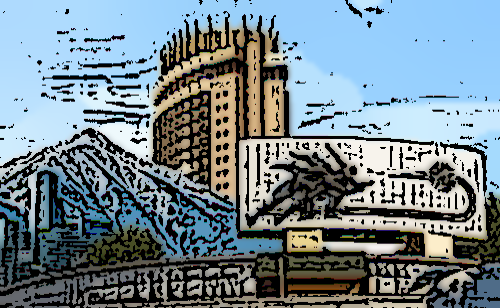

Image saved as 'almaty_cartoon.jpg'


In [137]:
cartoon_filter.start(image='almaty.jpg', new_image='almaty_cartoon.jpg')

## Negative filtering

In [ ]:


# find max GSV
def findMax(k):
    mx = 0
    for i in k:
        if i>mx:
            mx = i
    return mx

class Negative(object):

    def __init__(self):
        pass
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_gray = cv2.imread(img_rgb, 0)
        img_gray = self.resize(img_gray, 500)
        #get all image values
        k = []
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                k.append(img_gray[i,j])
        L = findMax(k) #max GSV
        dst = img_gray[:] #copy image
        #update dst
        for i in range(img_gray.shape[0]):
          for j in range(img_gray.shape[1]):
            dst[i,j] = L - dst[i,j]
        return dst
    def start(self, img_path, image, new_image):
        tmp_canvas = Negative() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        cv2.imshow("Negative Version", res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Image saved as {new_image}")


In [ ]:
def render(self, img_path):
    img_gray = cv2.imread(img_path, 0)
    if img_gray is None:
        print(f"Error: Could not load image {img_path}")
        return None

    img_gray = self.resize(img_gray, 500)
    # get all image values
    k = []
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            k.append(img_gray[i,j])
    L = findMax(k) # max GSV
    dst = img_gray.copy() # copy image (исправлено)
    # update dst
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            dst[i,j] = L - dst[i,j]
    return dst

def start(self, img_path, new_image):
    tmp_canvas = Negative()
    res = tmp_canvas.render(img_path)
    if res is not None:
        cv2.imwrite(new_image, res)
        from google.colab.patches import cv2_imshow
        cv2_imshow(res)
        print(f"Image saved as {new_image}")

In [ ]:
negative_filter = Negative()

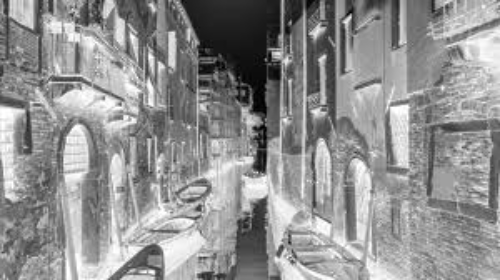

Image saved as image_Venice_negative.jpg


In [ ]:
negative_filter.start('Venice.jpg', 'image_Venice_negative.jpg')

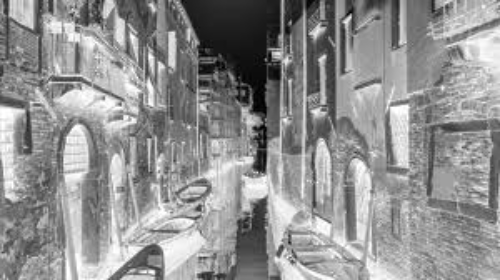

Image saved as image_Venice_negative.jpg


In [ ]:
# find max GSV
def findMax(k):
    mx = 0
    for i in k:
        if i>mx:
            mx = i
    return mx

class Negative(object):
    def __init__(self):
        pass

    def resize(self, image, window_height=500):
        if image is None:
            raise ValueError("Image is None - cannot resize")
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height), int(window_width)))
        return image

    def render(self, img_path):
        img_gray = cv2.imread(img_path, 0)
        if img_gray is None:
            print(f"Error: Could not load image {img_path}")
            return None

        img_gray = self.resize(img_gray, 500)
        # get all image values
        k = []
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                k.append(img_gray[i,j])
        L = findMax(k) # max GSV
        dst = img_gray.copy()
        # update dst
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                dst[i,j] = L - dst[i,j]
        return dst

    def start(self, img_path, new_image):
        tmp_canvas = Negative() # make a temporary object
        res = tmp_canvas.render(img_path)  # Передаем путь к изображению
        if res is not None:
            cv2.imwrite(new_image, res)
            # Для Colab используем cv2_imshow вместо cv2.imshow
            from google.colab.patches import cv2_imshow
            cv2_imshow(res)
            print(f"Image saved as {new_image}")


negative_filter = Negative()
negative_filter.start('Venice.jpg', 'image_Venice_negative.jpg')

## OLD FILTER

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
import argparse
import random
import os, sys

class old_filter(object):
    """old_filter effect
        A class that applies a random old filter effect to an image
        using a set of pre-designed filters and applying Arithmetic
        Operations on Image to add the filter effect on it.
    """

    def __init__(self):
        pass

    #function to resize
    #according to the aspect ratio of the image
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    #function that renders the image
    def render(self, img_rgb):
        img = cv2.imread(img_rgb,0)
        img = self.resize(img, 500)

        filtern = []
        filters = list(range(1,7))
        for l in filters:
            filtern.append(str(l) +'n')
        #filtern -> stores numbers (1-7) with preceeding n
        #filters -> all numbers (1-7) and elements of filtern
        filters.extend(filtern)

        #selects random filter everytime
        selectedfilter = str(random.choice(filters))
        #print(selectedfilter)
        #filter path in generalized form to work in all systems
        #filter_path = os.path.abspath(os.path.join('oldfilters','old' + selectedfilter + '.jpg'))
        filter_path = img_rgb
        if selectedfilter.endswith('n'):
            #selected file is an normal filter and Arithmetic addition
            #needs to be applied on it

            old = cv2.imread(filter_path,0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)

            #Arithmetic add
            add=cv2.add(img,old)
            return add

        else:
            #selected file is an inverted filter and Weighted addition
            #needs to be applied on it

            old = cv2.imread(filter_path, 0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #print old.shape
            #for i in range(old.shape[0]):
            #	 for j in range(old.shape[1]):
            #		if old[i][j]>200:
            #			old[i][j]=255
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)

            #Weightedadd
            add=cv2.addWeighted(img,0.7,old,0.3,0)
            return add

    def start(self, image, new_image):
        tmp_canvas = old_filter()
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        from google.colab.patches import cv2_imshow
        cv2_imshow(res)
        print(f"Image saved as {new_image}")

In [ ]:
old_filters = old_filter()

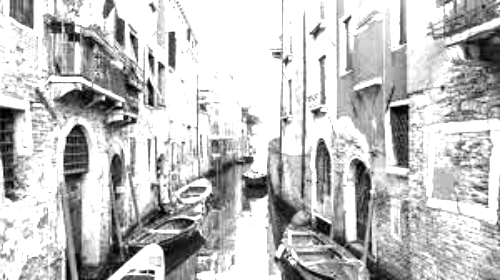

Image saved as image_Venice_old.jpg


In [ ]:
old_filters.start(image = 'Venice.jpg',  new_image = 'image_Venice_old.jpg' )